In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install holoviews hvplot
import hvplot.pandas

In [45]:
df=pd.read_csv("/content/ted_main.csv")
df.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [46]:
df.shape

(2550, 17)

In [47]:
df.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

Find the missing values.

In [49]:
df.isna().sum()


comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

Fill the missing values

In [50]:
df.speaker_occupation.mode()

0    Writer
Name: speaker_occupation, dtype: object

In [51]:
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [52]:
# fill the miising values. In the general case if the missing values type is numerique
# we fill it with mean values. if its an object we fill missing values with mode.
df["speaker_occupation"]=df.speaker_occupation.fillna(df.speaker_occupation.mode())

In [53]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


Which talks provoke the most online discussion?


<ipython-input-54-035af9833568>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

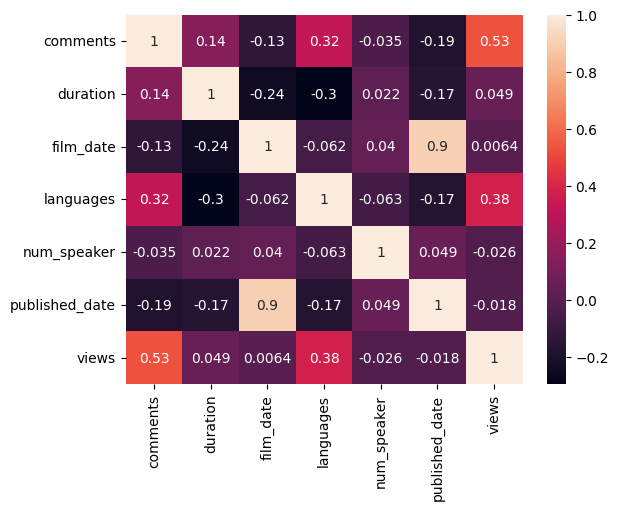

In [54]:
corr=df.corr()
sn.heatmap(corr, annot=True)

From the heatmap, the number of views correlates well with language and comments.

In [55]:
# sort by the number of first-level comments, though this is biased in favor of older talks
df.sort_values('comments').tail()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


Limitations of this approach:

>Sub comments (nested comments).

>How long has it been online?

To correct this behavior, one solution is to normalise comments by views.

In [58]:
# creating a new column 'comments_per_view'
df['comments_per_view'] = df.comments/df.views

# interpretation: for every view of the same-sex marriage talk, there are 0.002 comments
df.sort_values('comments_per_view').tail()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [60]:
# make this more interpretable by inverting the calculation
df['views_per_comment'] = df.views / df.comments

# interpretation: 1 out of every 450 people leave a comment
df.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,0.001360,735.525682


Points to note:

Considered the limitations and biases of the data when analyzing it

Made the results understandable

In [65]:
# check how many observations we removed from the plot
df[df.comments >= 1000].shape

(32, 19)

:: What were the "best" events in TED history to attend?¶


In [69]:
df.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,8487.750000
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,20245.984823


In [88]:
def clean_event(event):
  years = list(range(1990,2018,1))

  for year in years:
    if str(year) in event:
      return f"TED_{year}"
    else:
      return event

In [79]:
print(df.event.nunique())
print(df.event.apply(clean_event).nunique())


355
274


In [89]:
df['event'] = df.event.apply(clean_event)


In [83]:
# count the number of talks (great if you value variety, but they may not be great talks)
df.event.value_counts().head()



TED_2009    199
TED_2010    184
TED_2011    184
TED_2013    183
TED_2012    178
Name: event, dtype: int64

In [86]:
# using views as a proxy for "quality of talk"
df.groupby("event").views.mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [96]:
df.groupby("event").views.mean().tail()

event
TEDxZurich                   621431.0
The Do Lectures              112321.0
Toronto Youth Corps         1028630.0
University of California     261831.5
World Science Festival      3302312.0
Name: views, dtype: float64

In [91]:
# finding the largest values, but we don't know how many talks are being averaged
df.groupby('event').views.mean().sort_values().tail()


event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [87]:
# showing the number of talks along with the mean (events with the highest means had only 1 or 2 talks)
df.groupby('event').views.agg(['count', 'mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [97]:
# calculating the total views per event
df.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED_2011,184,1.647446e+06,303129998
TED_2014,175,1.771702e+06,310047809
TED_2009,199,1.655109e+06,329366748
TED_2012,178,1.988426e+06,353939901
TED_2013,183,2.348508e+06,429776940


In [99]:
df.event.value_counts()[:20]

TED_2009            199
TED_2010            184
TED_2011            184
TED_2013            183
TED_2012            178
TED_2014            175
TED_2015            126
TED_2007            113
TED_2016            112
TED_2008             80
TED_2017             70
TED_2005             63
TED_2006             49
TEDSummit            34
TED_2003             34
TED_2004             31
TED_2002             28
TEDxBeaconStreet     22
TED Talks Live       20
TEDNYC               19
Name: event, dtype: int64